In [5]:
import matplotlib.pyplot as plt
import sys
sys.path.append("../../..")

from fridom.NonHydrostatic.ModelSettings import ModelSettings
from fridom.NonHydrostatic.Grid import Grid
from fridom.NonHydrostatic.InitialConditions import Jet
from fridom.NonHydrostatic.Projection import GeostrophicSpectral
from fridom.NonHydrostatic.Model import Model
from fridom.NonHydrostatic.Plot import Plot
from fridom.NonHydrostatic.ModelPlotter import ModelPlotter


In [2]:
def get_spectra(intervals=7, runlen=1.0, enable_bi=False):
    mset = ModelSettings(N=[2**8, 2**8, 2**6], L=[4, 4, 1], dt=0.001, Ro=0.5)
    mset.enable_tqdm = False
    mset.enable_biharmonic = enable_bi

    if enable_bi:
        mset.scale_biharmonic()

    grid = Grid(mset)
    jet = Jet(mset, grid)

    m = Model(mset, grid)
    m.z = jet.copy()
    spectras = []
    k, spectra_1d = (m.z.etot()**0.5).spectra_1d()
    spectras.append(spectra_1d.get())

    for i in range(intervals):
        m.run(runlen=runlen)
        k, spectra_1d = (m.z.etot()**0.5).spectra_1d()
        spectras.append(spectra_1d.get())
    return k.get(), spectras


In [3]:
k_ori, spectra_ori = get_spectra(enable_bi=False)
k_bih, spectra_bih = get_spectra(enable_bi=True)

348.2494779329698 6.283185307179586
348.2494779329698 6.283185307179586
348.2494779329698 6.283185307179586
348.2494779329698 6.283185307179586
348.2494779329698 6.283185307179586
348.2494779329698 6.283185307179586
348.2494779329698 6.283185307179586
348.2494779329698 6.283185307179586
348.2494779329698 6.283185307179586
348.2494779329698 6.283185307179586
348.2494779329698 6.283185307179586
348.2494779329698 6.283185307179586
348.2494779329698 6.283185307179586
348.2494779329698 6.283185307179586
348.2494779329698 6.283185307179586
348.2494779329698 6.283185307179586


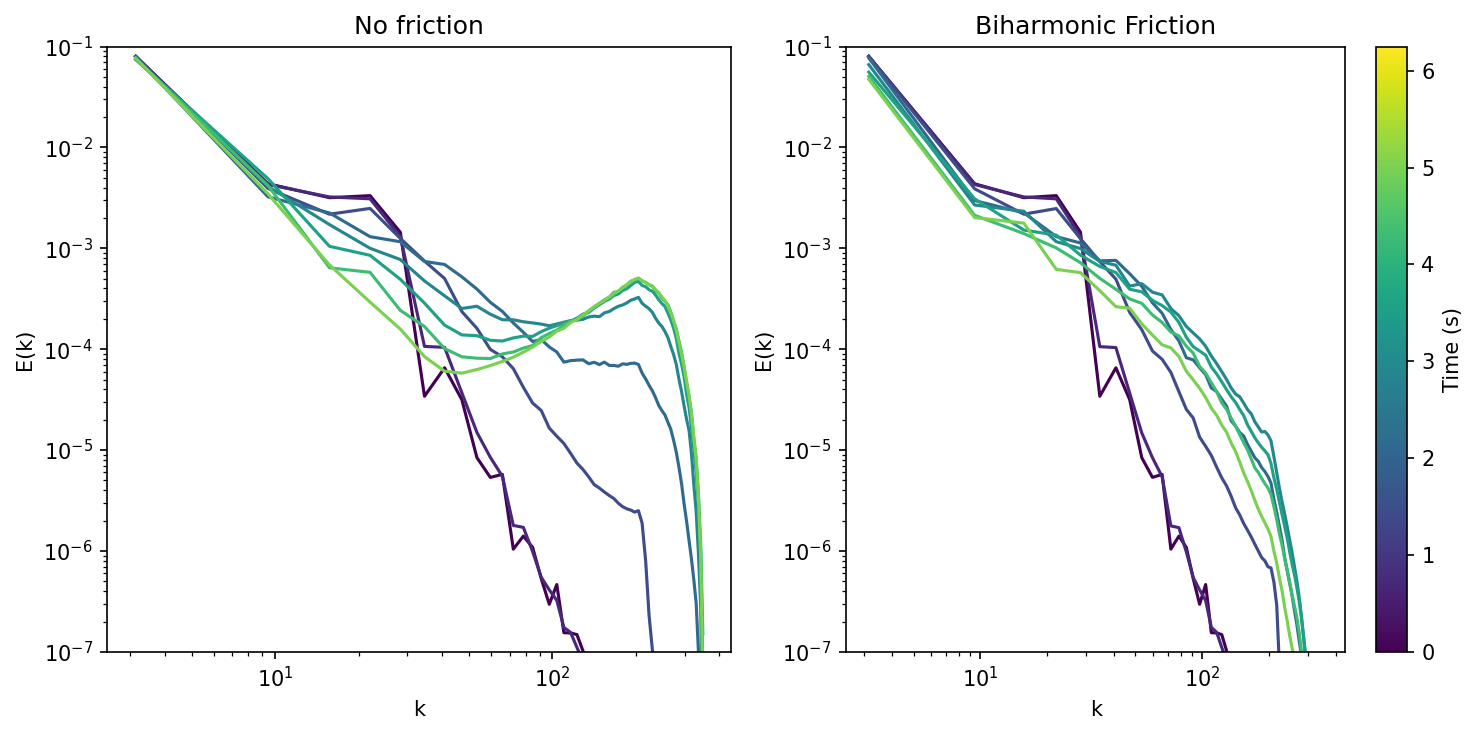

In [6]:
# get colors from viridis colormap
k = k_ori
s = [spectra_ori, spectra_bih]

def plot_spectra(k, spectras):
    from matplotlib import cm
    import numpy as np

    fig, axs = plt.subplots(1, 2, figsize=(10, 5), dpi=150, tight_layout=True)

    colors = cm.viridis(np.linspace(0.0, 0.8, len(spectras[0])))
    titles = ["No friction", "Biharmonic Friction"]

    for spectras_, ax, title in zip(spectras, axs, titles):
        for spectra, c in zip(spectras_, colors):
            ax.loglog(k, spectra, c=c)

        ax.set_ylim([1e-7, 1e-1])
        ax.set_title(title)
        ax.set_xlabel("k")
        ax.set_ylabel("E(k)")

    #add colorbar
    sm = plt.cm.ScalarMappable(cmap=cm.viridis,
                            norm=plt.Normalize(vmin=0, vmax=5/0.8))
    sm._A = []
    cbar = fig.colorbar(sm, ax=ax, orientation='vertical')
    cbar.set_label("Time (s)")

plot_spectra(k, s)